# Initialize

In [64]:
# load and initialize kmapper
import kmapper as km
import kmapper.jupyter as kmj

mapper = km.KeplerMapper(verbose=0);

Other initializations:

In [65]:
import numpy as np
import sklearn
import math

# Prepare data

In [66]:
# generate 1000 random points with noise on circle of radius 1
N = 1000
noiselevel = 0.05

angle = math.pi * 2 * np.random.rand(N)
data = np.stack((np.cos(angle), np.sin(angle)), axis=1) + np.random.normal((0,0), noiselevel, (N,2))

# embed into 3d
data3 = np.zeros((N,3))
data3[:,:-1] = data

# Choice of filter function
Terminology: image of filter function is also called the 'lens'

In [67]:
# project to 1st coordinate
lens = data3[:,[0]]

# OR, using kmapper:
lens_mapper = mapper.fit_transform(data3, projection=[0],scaler=None);

The above two commands give the same lens

In [68]:
%matplotlib inline

# Plot the data with lens...

In [69]:
# for drawing
import matplotlib.colors
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [70]:
def scatter3d(X, lens, colorsMap='viridis'):
    cs = lens[:,0].tolist()
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    color_function = scalarMap.to_rgba(cs)

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=color_function)

    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    return

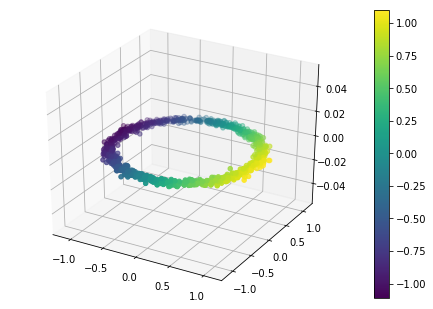

In [71]:
scatter3d(data3, lens);

# Do mapper

1. Filter function: projection to first axis
2. Cover: uniform cover with n=10, p=20%
3. Cluster algorithm: DBSCAN

In [78]:
graph = mapper.map(lens,
                   data3,
                   clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5),
                   cover=km.Cover(n_cubes=10, perc_overlap=0.2));

Mapper graph is stored in output 'graph'. Visualize using:

In [79]:
mapper.visualize(graph, color_values=lens,
                 path_html = "circle_output.html",
                 title = "circle");

In [81]:
kmj.display("circle_output.html");

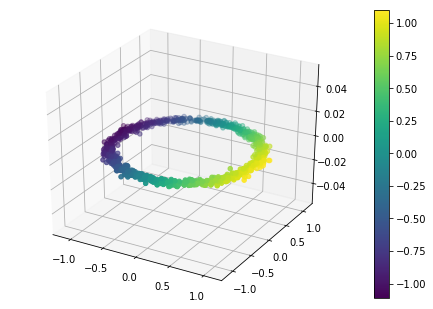

In [82]:
scatter3d(data3, lens);

# Other lens?

In [86]:
angle_lens = np.angle(data3[:,0] + 1.j*data3[:,1] ).reshape(N,1)
angle_graph = mapper.map(angle_lens, data3,
                         clusterer=sklearn.cluster.DBSCAN(eps=0.1, min_samples=5),
                         cover=km.Cover(n_cubes=10, perc_overlap=0.2));
mapper.visualize(angle_graph, color_values=angle_lens,
                 path_html = "angle_circle_output.html", title = "angle circle");

In [88]:
kmj.display("angle_circle_output.html");